<a href="https://colab.research.google.com/github/wadh5811/Fall-21-Research/blob/main/MTA_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from collections import defaultdict
from dateutil.parser import parse
from datetime import datetime
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)
start_time = time.time()

In [ ]:
#read and process all files in dataset
def read_mta(file_nums):
    path ='http://web.mta.info/developers/data/nyct/turnstile/turnstile_'
    allFiles = []
    for i in file_nums:
        allFiles.append(path + i + ".txt")
    df_list = []
    for file in allFiles:
        try:
            df_list.append(pd.read_csv(file))
        except:
            print(file)
#     df_list = [pd.read_csv(file) for file in allFiles]
    df = pd.concat(df_list)
    df.columns = df.columns.str.strip()
    return df

In [ ]:
#read monthly files by week
def str_creat(str_):
    result = [str_]
    num = int(str_)
    last_two = int(str_[-2:]) 
    while last_two - 7 > 0:
        num = num - 7
        result.append(str(num))
        last_two = last_two - 7
    return result

In [ ]:
def date_generate(start_list):
    result = []
    for date in start_list:
        tmp = str_creat(date)
        result += tmp
    return result

In [ ]:
#testing
def test_str_creat(str_, answer):
    if str_creat(str_) == answer:
        print('It is correct')
    else:
        print('The function is not right')

In [ ]:
str_creat('211225')

['211225', '211218', '211211', '211204']

In [ ]:
#2021's data by month
start_list = ['211225','211127','211030','210925','210828','210731','210626','210529','210424','210327','210227','210130']
date_read = date_generate(start_list)

# New section

In [ ]:
df = read_mta(date_read)
df.DESC.unique()
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,03:00:00,REGULAR,7672966,2645023
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,07:00:00,REGULAR,7672969,2645040
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,11:00:00,REGULAR,7672991,2645127
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,15:00:00,REGULAR,7673037,2645193
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,19:00:00,REGULAR,7673097,2645270


In [ ]:
# remove duplicates
df = df[df.DESC != 'RECOVR AUD']
df = df[df.TIME != '04:01:13']
# Sanity check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(df
 .groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME'])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,01/01/2021,03:00:00,1
7234026,R139,R031,04-00-00,34 ST-PENN STA,04/23/2021,12:00:00,1
7234028,R139,R031,04-00-00,34 ST-PENN STA,04/23/2021,20:00:00,1
7234029,R139,R031,04-00-00,34 ST-PENN STA,04/24/2021,00:00:00,1
7234030,R139,R031,04-00-00,34 ST-PENN STA,04/24/2021,04:00:00,1


In [ ]:
#create data for week of year column
df['Week_of_Year'] = pd.to_datetime(df['DATE']).dt.strftime('%Y-%U')
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Week_of_Year
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,03:00:00,REGULAR,7672966,2645023,2021-50
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,07:00:00,REGULAR,7672969,2645040,2021-50
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,11:00:00,REGULAR,7672991,2645127,2021-50
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,15:00:00,REGULAR,7673037,2645193,2021-50
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,19:00:00,REGULAR,7673097,2645270,2021-50
...,...,...,...,...,...,...,...,...,...,...,...,...
210428,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,04:00:00,REGULAR,5554,541,2021-00
210429,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,08:00:00,REGULAR,5554,541,2021-00
210430,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,12:00:00,REGULAR,5554,541,2021-00
210431,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,16:00:00,REGULAR,5554,541,2021-00


In [ ]:
Exits_max = df[['Week_of_Year', 'EXITS', 'DATE']].groupby(['Week_of_Year']).max().reset_index()
Exits_min = df[['Week_of_Year', 'EXITS', 'DATE']].groupby(['Week_of_Year']).min().reset_index()

In [ ]:
#### removing values that appear to be counter resets
df_new = df[df.EXITS <= 11000]

In [ ]:
Exit = (df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'])['EXITS'].max()\
           -df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'])['EXITS'].min()).reset_index()

In [ ]:
Exit['EXITS'].describe()

count    1.817e+06
mean     1.800e+04
std      4.715e+06
min      0.000e+00
25%      6.200e+01
50%      2.150e+02
75%      4.970e+02
max      2.134e+09
Name: EXITS, dtype: float64

In [ ]:
Exit = Exit[Exit.EXITS <= 11000]

In [ ]:
Exit['Week_of_Year'] = pd.to_datetime(Exit['DATE']).dt.strftime('%Y-%U')

In [ ]:
Exit_cnt = Exit[['Week_of_Year', 'EXITS']].groupby(['Week_of_Year']).sum().reset_index().iloc[3:].reset_index(drop = True) 

In [ ]:
Exit_cnt = Exit_cnt[Exit_cnt['Week_of_Year'] != '2021-00'].reset_index(drop = True) 

In [ ]:
Exit_cnt[Exit_cnt['Week_of_Year'] == '2021-01']

,Week_of_Year,EXITS
0,2021-01,9003484


In [ ]:
Exit_2021 = Exit_cnt[Exit_cnt['Week_of_Year'] >= '2021-00'].reset_index(drop = True)
Exit_2021['Year'] = '2021'
Exit_2021['Week Num'] = Exit_2021['Week_of_Year'].apply(lambda x: x.split('-')[1])

In [ ]:
import datetime
import warnings
warnings.filterwarnings("ignore")
Exit_2021['Week_of_Year'] = Exit_2021['Week_of_Year'].apply(lambda x: datetime.datetime.strptime(x + '-1', "%Y-%W-%w"))
Exit_2021['Week_of_Year'] = Exit_2021['Week_of_Year'].dt.strftime("%m-%d")

In [ ]:
print(pd.concat([Exit_2021]))
Exit_result = pd.concat([Exit_2021]).reset_index(drop = True)

   Week_of_Year     EXITS  Year Week Num
0         01-04   9003484  2021       01
1         01-11   9139851  2021       02
2         01-18   8962914  2021       03
3         01-25   8939227  2021       04
4         02-01   8097037  2021       05
..          ...       ...   ...      ...
46        11-22  14806595  2021       47
47        11-29  17651359  2021       48
48        12-06  18278979  2021       49
49        12-13  17481855  2021       50
50        12-20  12429014  2021       51

[51 rows x 4 columns]


In [ ]:
Exit_result.head()

,Week_of_Year,EXITS,Year,Week Num
0,01-04,9003484,2021,01
1,01-11,9139851,2021,02
2,01-18,8962914,2021,03
3,01-25,8939227,2021,04
4,02-01,8097037,2021,05


In [ ]:
Exit_result.tail()

,Week_of_Year,EXITS,Year,Week Num
46,11-22,14806595,2021,47
47,11-29,17651359,2021,48
48,12-06,18278979,2021,49
49,12-13,17481855,2021,50
50,12-20,12429014,2021,51


In [ ]:
result=Exit_result[Exit_result["Week_of_Year"]<='12-31']

In [ ]:
#plot bar chart
import matplotlib.ticker as mtick
import seaborn as sns
def bar_plot_2021(df_result):
    
    f = sns.catplot(
    data=df_result,
    x='Week_of_Year',
    y='EXITS',
    hue='Year',
    kind='bar',
    height=7, 
    aspect=3.0,
    saturation=0.8,
    legend=False)

    title = 'MTA Exits Number in 2021'
    plt.title(title , fontsize = 35)
    plt.ylabel("Subway", fontsize = 15)
    plt.xlabel(" ", fontsize = 15)
    plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
    plt.xticks(fontsize=30, rotation= 60)
    plt.yticks(fontsize=15)

    plt.legend(loc="upper right", fontsize = 18,ncol=4)
    plt.show()
    f.savefig("subway_exits_2021.pdf", bbox_inches='tight')


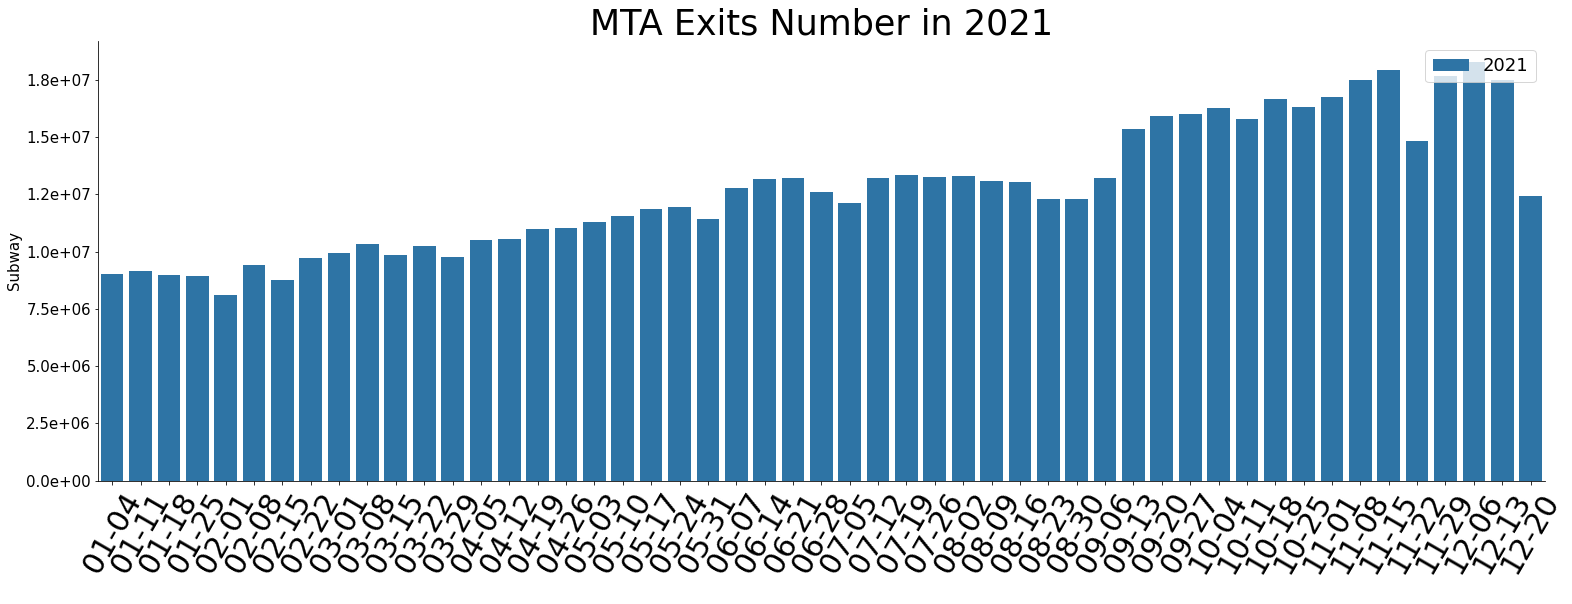

In [ ]:
bar_plot_2021(result)

In [ ]:
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
Entry = (df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'])['ENTRIES'].max()\
           -df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'])['ENTRIES'].min()).reset_index()

Entry = Entry[Entry.ENTRIES <= 11000]
Entry['Week_of_Year'] = pd.to_datetime(Entry['DATE']).dt.strftime('%Y-%U')
Entry_cnt = Entry[['Week_of_Year', 'ENTRIES']].groupby(['Week_of_Year']).sum().reset_index().iloc[3:].reset_index(drop = True)
Entry_cnt = Entry_cnt[Entry_cnt['Week_of_Year'] != '2021-00'].reset_index(drop = True) 

Entry_2021 = Entry_cnt[Entry_cnt['Week_of_Year'] >= '2021-00'].reset_index(drop = True)
Entry_2021['Year'] = '2021'
Entry_2021['Week Num'] = Entry_2021['Week_of_Year'].apply(lambda x: x.split('-')[1])

In [ ]:
Entry_2021['Week_of_Year'] = Entry_2021['Week_of_Year'].apply(lambda x: datetime.datetime.strptime(x + '-1', "%Y-%W-%w"))
Entry_2021['Week_of_Year'] = Entry_2021['Week_of_Year'].dt.strftime("%m-%d")
Entry_result = pd.concat([Entry_2021]).reset_index(drop = True)

In [ ]:
def bar_plot_2021(df_result):
    
    f = sns.catplot(
    data=df_result,
    x='Week_of_Year',
    y='ENTRIES',
    hue='Year',
    kind='bar',
    height=10, 
    aspect=3.0,
    saturation=0.8,
    legend=False)

    title = 'MTA Entries Number in 2021'
    plt.title(title , fontsize = 35)
    plt.ylabel("Entries Number", fontsize = 25)
    plt.xlabel("Week Number", fontsize = 25)

    plt.xticks(fontsize=30, rotation= 60)
    plt.yticks(fontsize=20)

    plt.legend(fontsize = 18)
    plt.show()
    f.savefig("subway_entries_2021.pdf", bbox_inches='tight')


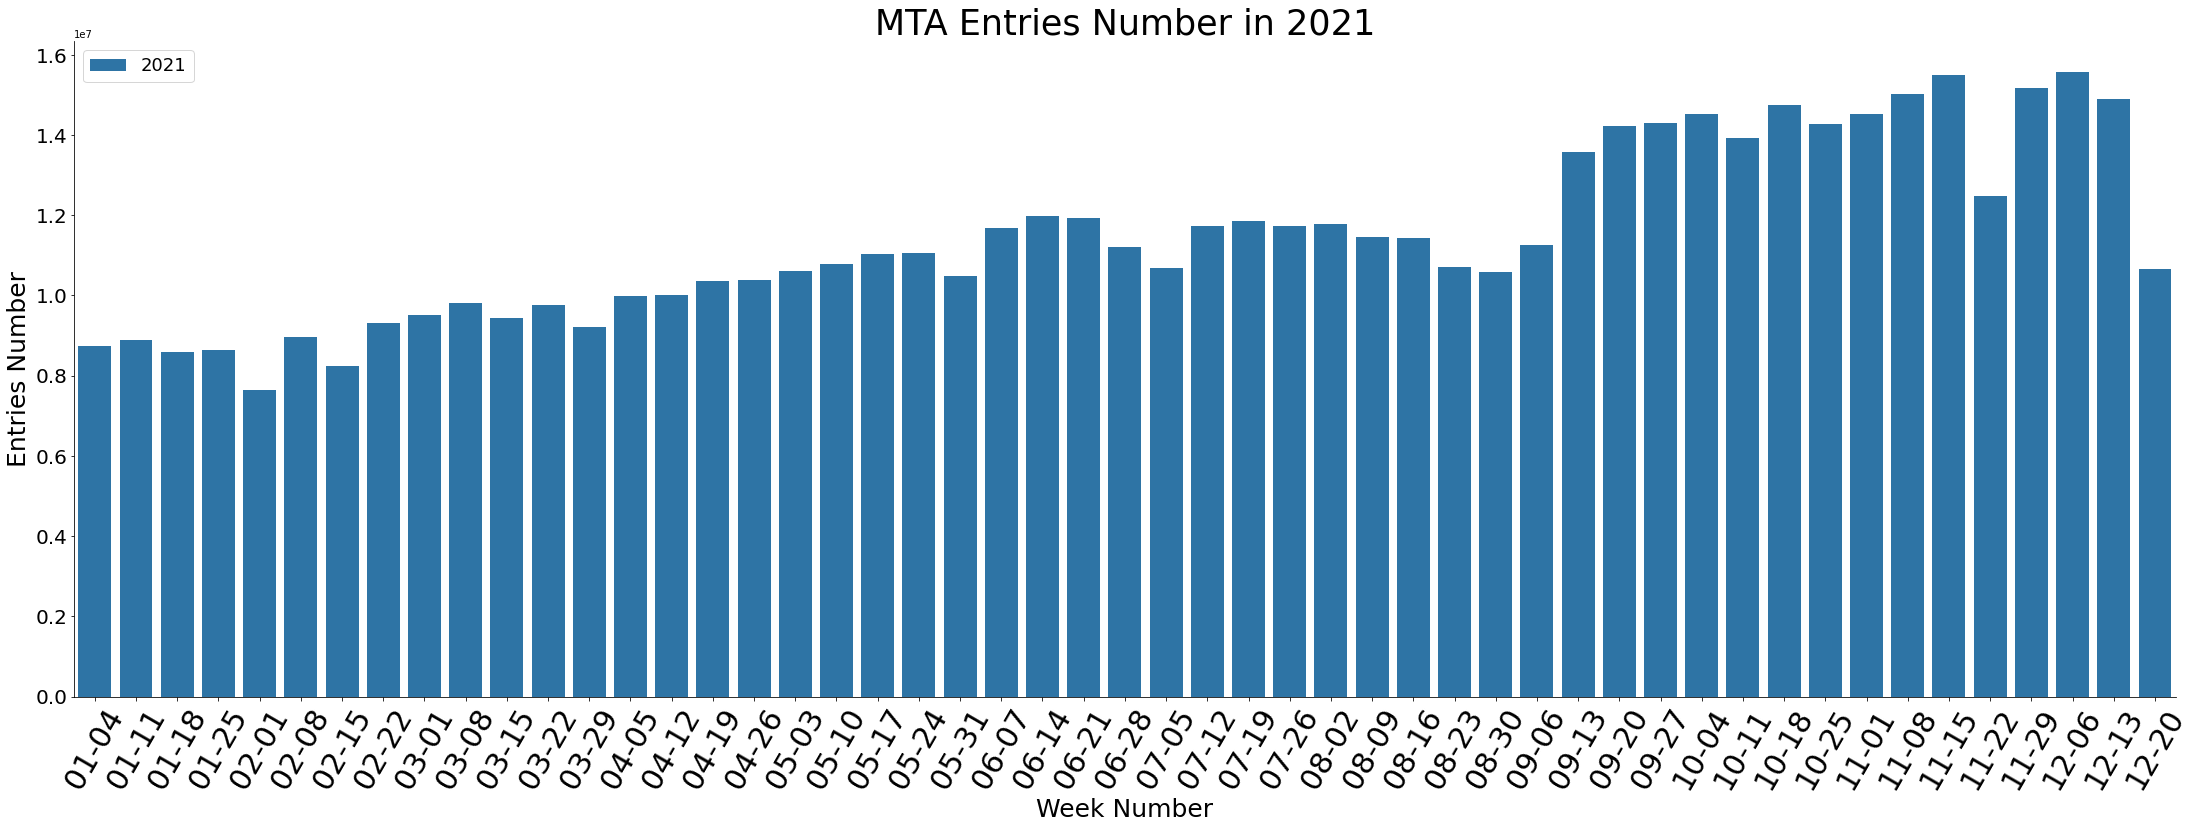

In [ ]:
bar_plot_2021(Entry_result)

In [ ]:
Exit_result.to_csv('MTA 2021 Exits.csv')

In [ ]:
Entry_result.to_csv('MTA 2021 Entries.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/
%mkdir /content/MTA_21
%ls

/content
 gdrive/                 MTA_21/                   subway_exits_2021.pdf
'MTA 2021 Entries.csv'   sample_data/
'MTA 2021 Exits.csv'     subway_entries_2021.pdf


In [ ]:
import shutil, os
files = ['MTA 2021 Exits.csv', 'MTA 2021 Entries.csv', 'subway_entries_2021.pdf', 'subway_exits_2021.pdf']
for f in files:
    shutil.move(f, '/content/MTA_21')

In [ ]:
!cp -r MTA_21 gdrive/MyDrive